# Système linéaire max-plus

work in progress ...

In [2]:
push!(LOAD_PATH, pwd())
using MaxPlus

In [6]:
S1 = mpsyslin(MP([1.0 2; 3 4]), MP([0.0; 0]), MP([0.0 0]), mpeye(Float64, 2,2))

Implicit dynamic linear maxplus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
  D  = MP{Float64}[0 . .; . 0 .; . . 0]
  A  = MP{Float64}[1 2 3; 4 5 6; 7 8 9]
  B  = MP{Float64}[0; 0; 0]
  C  = MP{Float64}[0 0 0]
  x0 = MP{Float64}[.; .; .]


In [7]:
S2 = mpsyslin(MP([1.0 2 3; 4 5 6; 7 8 9]), MP([0.0;0;0]), MP([0.0 0 0]), mpeye(Float64, 3,3))

Implicit dynamic linear maxplus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
  D  = MP{Float64}[0 . .; . 0 .; . . 0]
  A  = MP{Float64}[1 2 3; 4 5 6; 7 8 9]
  B  = MP{Float64}[0; 0; 0]
  C  = MP{Float64}[0 0 0]
  x0 = MP{Float64}[.; .; .]


Vers du code LaTeX :

In [10]:
LaTeX(stdout, S1)

\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}

Ce qui donnera pour S1:
$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}$$

Et pour S2:
$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . \\
. & 0 & . \\
. & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$

---
#### Conversion vers système explicite

In [11]:
S = mpexplicit(S1)

Implicit dynamic linear maxplus system:
  x(n) = D*x(n) + A*x(n-1) + B*u(n)
  y(n) = C*x(n)
  x(0) = x0

with:
  D  = MP{Float64}[0 .; . 0]
  A  = MP{Float64}[1 2; 3 4]
  B  = MP{Float64}[0; 0]
  C  = MP{Float64}[0 0]
  x0 = MP{Float64}[.; .]


In [14]:
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . \\
. & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 \\
3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
\end{array}
\right]
\end{array}$$

---
### Simulation

In [53]:
u = 1:10
res = mpsimul(S, MP(u), true)

1×10 Array{MP{Float64},2}:
 1  5  9  13  17  21  25  29  33  37

In [37]:
using Plots

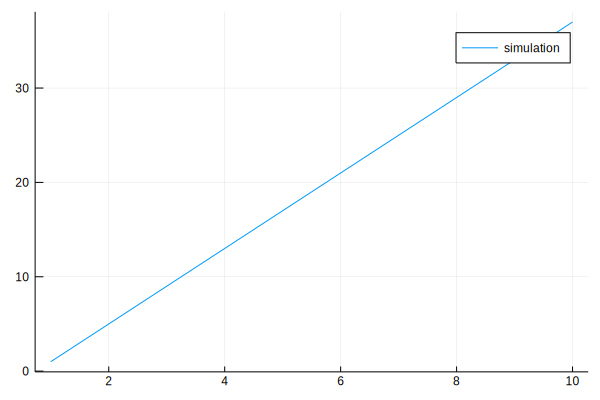

In [57]:
y = plustimes(res[:])
plot(u, y, label=["simulation"])

---
### Composition de systèmes

Composition parallèle :

In [62]:
S = S1 + S2;
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . & . & . \\
. & 0 & . & . & . \\
. & . & 0 & . & . \\
. & . & . & 0 & . \\
. & . & . & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & . & . & . \\
3 & 4 & . & . & . \\
. & . & 1 & 2 & 3 \\
. & . & 4 & 5 & 6 \\
. & . & 7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
0 \\
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$

Composition diagonale :

In [64]:
S = S1 | S2;
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . & . & . \\
. & 0 & . & . & . \\
. & . & 0 & . & . \\
. & . & . & 0 & . \\
. & . & . & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & . & . & . \\
3 & 4 & . & . & . \\
. & . & 1 & 2 & 3 \\
. & . & 4 & 5 & 6 \\
. & . & 7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 & . \\
0 & . \\
. & 0 \\
. & 0 \\
. & 0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & . & . & . \\
. & . & 0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$

Composition en série :

In [67]:
S = S1 * S2;
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . & . & . \\
. & 0 & . & . & . \\
. & . & 0 & . & . \\
0 & 0 & 0 & 0 & . \\
0 & 0 & 0 & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & 3 & . & . \\
4 & 5 & 6 & . & . \\
7 & 8 & 9 & . & . \\
. & . & . & 1 & 2 \\
. & . & . & 3 & 4 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
0 \\
. \\
. \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
. & . & . & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$

Entrées communes :

In [71]:
S = [S1 S2];
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . & . & . \\
. & 0 & . & . & . \\
. & . & 0 & . & . \\
. & . & . & 0 & . \\
. & . & . & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & . & . & . \\
3 & 4 & . & . & . \\
. & . & 1 & 2 & 3 \\
. & . & 4 & 5 & 6 \\
. & . & 7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 & . \\
0 & . \\
. & 0 \\
. & 0 \\
. & 0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$

Sorties communes :

In [74]:
S = [S1; S2];
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & . & . & . \\
. & 0 & . & . & . \\
. & . & 0 & . & . \\
. & . & . & 0 & . \\
. & . & . & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & . & . & . \\
3 & 4 & . & . & . \\
. & . & 1 & 2 & 3 \\
. & . & 4 & 5 & 6 \\
. & . & 7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
0 \\
0 \\
0 \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & . & . & . \\
. & . & 0 & 0 & 0 \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$

Composition avec retro-action :

In [76]:
S = S1 / S2;
# LaTeX(stdout, S)

$$\begin{array}{lcl}
x_n & = & \left[
\begin{array}{*{20}c}
0 & . & 0 & 0 & 0 \\
. & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & . & . \\
0 & 0 & . & 0 & . \\
0 & 0 & . & . & 0 \\
\end{array}
\right]
 x_n \oplus \left[
\begin{array}{*{20}c}
1 & 2 & . & . & . \\
3 & 4 & . & . & . \\
. & . & 1 & 2 & 3 \\
. & . & 4 & 5 & 6 \\
. & . & 7 & 8 & 9 \\
\end{array}
\right]
 x_{n-1} \oplus \left[
\begin{array}{*{20}c}
0 \\
0 \\
. \\
. \\
. \\
\end{array}
\right]
 u_n\\y_n & = & \left[
\begin{array}{*{20}c}
0 & 0 & . & . & . \\
\end{array}
\right]
 x_n\\x_0 & = & \left[
\begin{array}{*{20}c}
. \\
. \\
. \\
. \\
. \\
\end{array}
\right]
\end{array}$$